In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
from tensorflow import keras
from keras.models import Sequential, load_model
from keras.layers import Activation, Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

import matplotlib.pyplot as plt
import numpy as np

In [3]:
x_train = train_path = '/content/drive/MyDrive/Dog/Train'
x_test = test_path = '/content/drive/MyDrive/Dog/Test'

In [4]:
x_train = x_test = ImageDataGenerator(rescale=1/255)

train_batches = x_train.flow_from_directory( train_path, target_size=(224, 224),
                                               batch_size=10, class_mode='categorical')

test_batches = x_test.flow_from_directory(test_path, target_size=(224, 224),
                                                batch_size=10, class_mode='categorical')

Found 1072 images belonging to 15 classes.
Found 1073 images belonging to 15 classes.


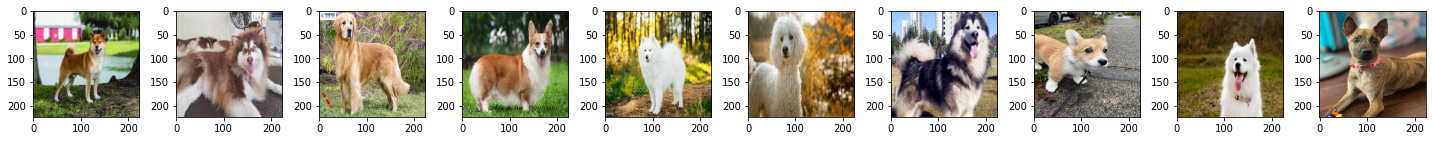

In [5]:
imgs, labels = next(test_batches)
fig, axes = plt.subplots(1, 10, figsize=(20,20))
axes = axes.flatten()

for i, ax in zip( imgs, axes):
  ax.imshow(i)
plt.tight_layout()
plt.show()

In [6]:
model=Sequential([                  
                  Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(224,224,3)),
                  MaxPool2D(pool_size=(2,2)),

                  Conv2D(64, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  MaxPool2D(pool_size=(2, 2)),
                  Dropout(0.2),

                  Conv2D(128, (3,3), activation='relu', padding = 'same'),
                  Flatten(), Dropout(0.5),
                  Dense(units=15, activation='softmax') ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 128)      0

In [8]:
model.compile(optimizer = Adam(learning_rate=0.0005),
              loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x=train_batches, steps_per_epoch=len(train_batches),validation_data=test_batches, epochs=20, verbose=1)

Epoch 1/20
 98/108 [==========================>...] - ETA: 2s - loss: 2.2448 - accuracy: 0.2994

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


108/108 [==============================] - 48s 439ms/step - loss: 2.2349 - accuracy: 0.2966 - val_loss: 1.9797 - val_accuracy: 0.3924
Epoch 2/20
108/108 [==============================] - 47s 434ms/step - loss: 1.9402 - accuracy: 0.3862 - val_loss: 1.5835 - val_accuracy: 0.5349
Epoch 3/20
108/108 [==============================] - 48s 447ms/step - loss: 1.6277 - accuracy: 0.4692 - val_loss: 1.2139 - val_accuracy: 0.6272
Epoch 4/20
108/108 [==============================] - 47s 434ms/step - loss: 1.2011 - accuracy: 0.6157 - val_loss: 0.7045 - val_accuracy: 0.8229
Epoch 5/20
108/108 [==============================] - 47s 435ms/step - loss: 0.7098 - accuracy: 0.7882 - val_loss: 0.2670 - val_accuracy: 0.9404
Epoch 6/20
108/108 [==============================] - 46s 432ms/step - loss: 0.3356 - accuracy: 0.8871 - val_loss: 0.0944 - val_accuracy: 0.9776
Epoch 7/20
108/108 [==============================] - 47s 436ms/step - loss: 0.1580 - accuracy: 0.9562 - val_loss: 0.0603 - val_accuracy: 0.9

In [9]:
 model.save('dog.h5')

In [10]:
classify = load_model('dog.h5')
dic = train_batches.class_indices
dic

{'Alaska': 0,
 'Beagle': 1,
 'Bull Phap': 2,
 'Bully': 3,
 'Chihuahua': 4,
 'Corgi': 5,
 'Golden': 6,
 'Husky': 7,
 'Lap Xuong': 8,
 'Phoc Soc': 9,
 'Phu Quoc': 10,
 'Poodle': 11,
 'Pug': 12,
 'Samoyed': 13,
 'Shiba Inu': 14}

kqua la: ['Alaska']


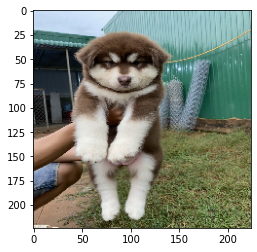

In [11]:
sample = load_img('/content/drive/MyDrive/Dog/Test/Alaska/ALASKA NÂU ĐỎ – Hoàng Gia Kennel.jpeg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['Shiba Inu']


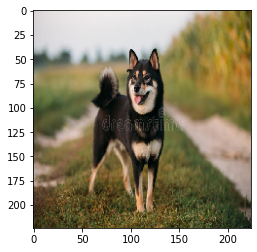

In [12]:
sample = load_img('/content/drive/MyDrive/Dog/Test/Shiba Inu/Beautiful Young Black and Tan Shiba Inu Dog.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['Phu Quoc']


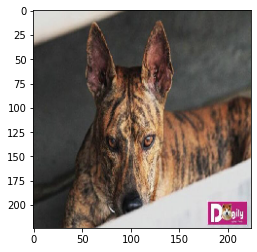

In [13]:
sample = load_img('/content/drive/MyDrive/Dog/Test/Phu Quoc/Chó Phú Quốc - Thông tin_ đặc điểm_ cách_yyt.jpg', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

kqua la: ['Lap Xuong']


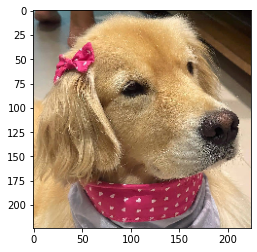

In [14]:
sample = load_img('/content/drive/MyDrive/Dog/Test/Golden/12 sự thật về chó Golden Retriever - Chúng_y.jfif', target_size =(224,224))
plt.imshow(sample)
sample = img_to_array(sample)
sample = sample.reshape(1,224,224,3)
sample = sample.astype('float32')
sample = sample/255

result = np.argmax(classify.predict(sample),axis= 1)
key = [k for k, v in dic.items() if v == result]
print('kqua la:', key)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


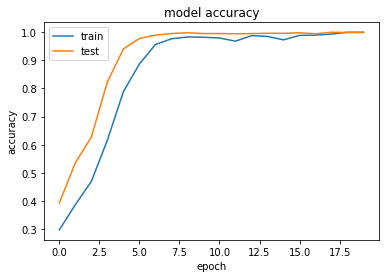

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper_left')